In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

print(tf.__version__)

2.17.0


In [3]:
# get mnist data 

path = 'mnist.npz'

# get data - this will be cached 
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


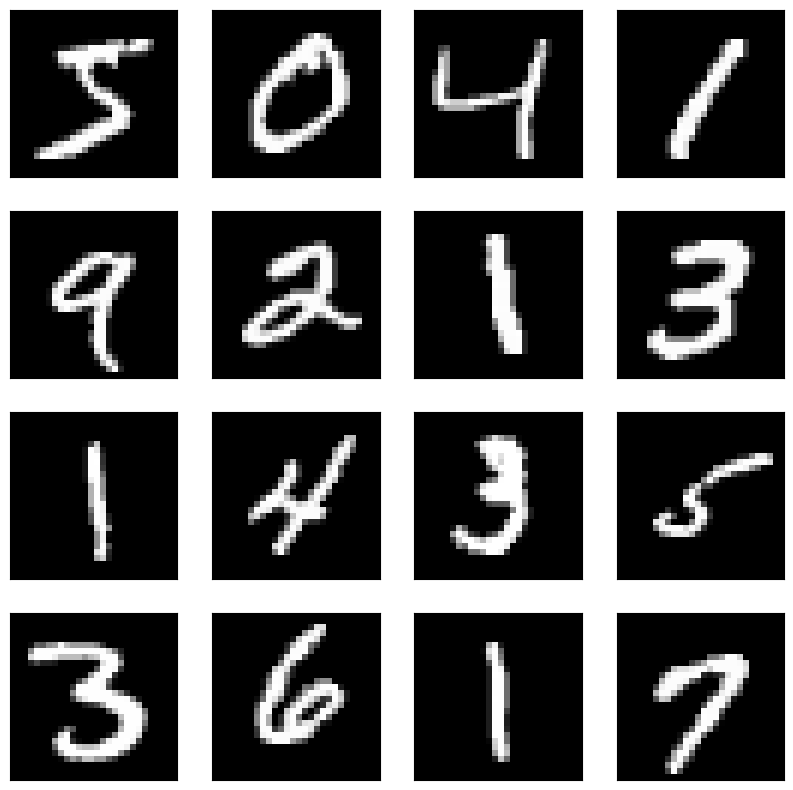

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], aspect=1, cmap='gray')
plt.show()

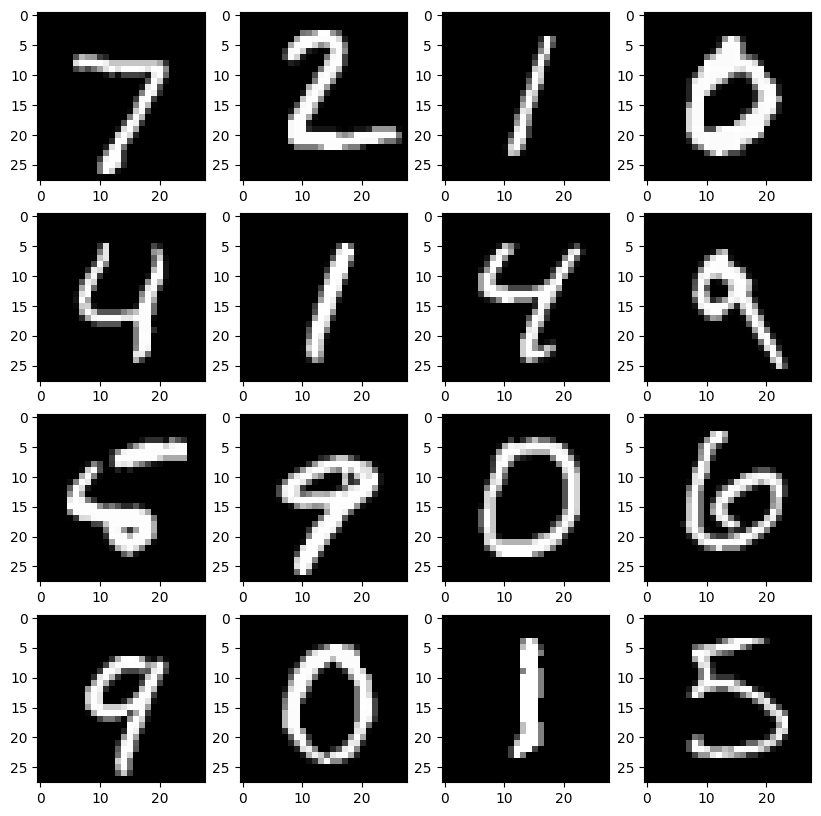

In [6]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i], aspect=1, cmap='gray')
plt.show()

In [7]:
# set up TF model and train 


# callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs)
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
                            
callbacks = myCallback()

# normalise 
x_train, x_test = x_train/255.0, x_test/255.0

# create model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

# fit model
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8987 - loss: 0.3460{'accuracy': 0.941433310508728, 'loss': 0.20135359466075897}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8987 - loss: 0.3458
Epoch 2/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9743 - loss: 0.0841{'accuracy': 0.9755833148956299, 'loss': 0.07993782311677933}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9743 - loss: 0.0841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9840 - loss: 0.0517{'accuracy': 0.9837499856948853, 'loss': 0.05312345549464226}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9840 - loss: 0.0517
Epoch 4/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9887 - loss: 0.0364{'accuracy': 0.9880499839782715, 'loss': 0.03790590167045593}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9887 - loss: 0.0364
Epoch 5/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9923 - loss: 0.0237{

In [8]:
res = model.predict(x_test[11:12])
print(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[1.7929917e-06 2.0433767e-10 3.4055873e-08 3.0937970e-09 8.9268570e-10
  6.7883780e-06 9.9997866e-01 5.9494959e-10 1.2778611e-05 4.3024678e-10]]


In [9]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
res = probability_model.predict(x_test[11:12])
index = np.argmax(res)
print(res)
print(index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[0.08533716 0.08533701 0.08533702 0.08533701 0.08533701 0.08533759
  0.23196508 0.08533701 0.0853381  0.08533701]]
6


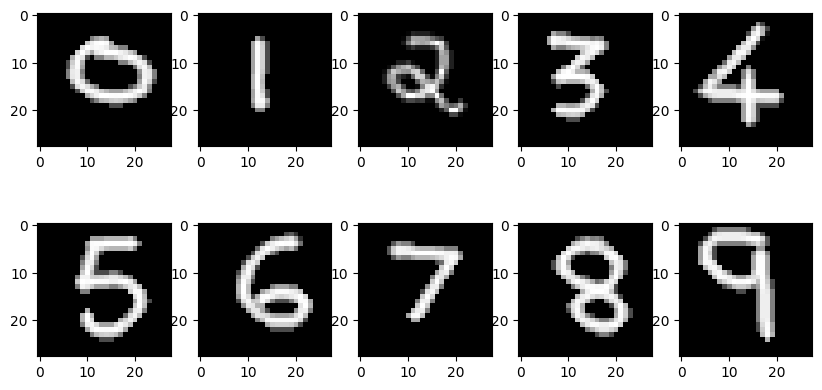

In [10]:
# display the digit images we created 
img_names = ['0.png', '1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
imgs = [np.array(Image.open(img_name)) for img_name in img_names]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imgs[i], aspect=1, cmap='gray')
plt.show()

In [11]:
def predict():
    img_data = np.array(imgs)
    res = probability_model.predict(img_data)
    print([np.argmax(a) for a in res])
predict()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[9, 2, 2, 3, 6, 5, 6, 2, 8, 3]


In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model2.summary())

# fit model
history2 = model2.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,769,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,774,858 (10.59 MB)

 Trainable params: 2,774,858 (10.59 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9259 - loss: 0.2468{'accuracy': 0.9618499875068665, 'loss': 0.12529179453849792}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.9259 - loss: 0.2467
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9862 - loss: 0.0439{'accuracy': 0.9864333271980286, 'loss': 0.04257636144757271}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9862 - loss: 0.0439
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9936 - loss: 0.0199{'accuracy': 0.992816686630249, 'loss': 0.02327142283320427}

Reached 99% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 57ms/step - accuracy: 0.9936 - loss: 0.0199
[0, 1, 2, 3, 4] 0.9910666942596436


(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[[5.4633089e-09 8.9950686e-11 1.3052460e-08 3.7827572e-09 6.2455027e-11
  8.3240064e-09 2.7589015e-13 1.0000000e+00 4.4947939e-12 1.7211116e-08]]
[7]


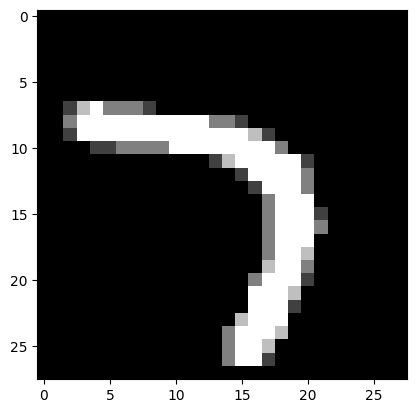

In [13]:
img_input = x_test[60:61]
print(img_input.shape)
res = model2.predict(img_input)
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')

In [14]:
img_data = img_data.reshape(img_data.shape[0], 28, 28, 1)
img_input = img_data[5]
print(img_data.shape)
res = model2.predict(img_input.reshape(1, 28, 28, 1))
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')

NameError: name 'img_data' is not defined